In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys,time
import numpy as np
from scipy.constants import c,hbar
from scipy.interpolate import griddata

from chimera.moduls.species import Specie
from chimera.moduls.chimera_main import ChimeraRun
from chimera.moduls.SR import SR
from chimera.moduls import fimera as chimera

In [2]:
K0 = 0.1 
Periods=50
g0=100.0

StepsPerPeriod=40
gg = g0/(1.+K0**2/2)**.5
vb = (1.-gg**-2)**0.5
k_res = 2*gg**2
dt = 1./StepsPerPeriod
Steps2Do = int((Periods+2)/dt)+1

specie_in = {'TimeStep':dt,
             'Devices':([chimera.undul_analytic,np.array([K0, 1., 0, Periods])],)
            }

beam = Specie(specie_in)

NumParts = 1
beam.Data['coords'] = np.zeros((3,NumParts))
beam.Data['momenta'] = np.zeros((3,NumParts))

beam.Data['momenta'][0] = np.sqrt(g0**2-1)

beam.Data['coords_halfstep'] = beam.Data['coords'].copy()
beam.Data['weights'] = np.ones((NumParts,))/NumParts

chimera_in = {'Particles':(beam,),}
Chimera = ChimeraRun(chimera_in)

sr_in = {'Grid':[(0.7*k_res,1.05*k_res),(-10.,10.),(-10.,10.),180.,(60,60,60)],
         'TimeStep':dt,'Features':(),'Mode':'near',
        }

sr_calc = SR(sr_in)
sr_calc.init_track(Steps2Do,beam)

In [3]:
t1 = time.time()
for i in range(Steps2Do):
    Chimera.make_step(i)
    sr_calc.add_track(beam)
    
t2 = time.time()
print('Done orbits in {:g} sec'.format(t2-t1))

sr_calc.calculate_spectrum(comp='y')
print('Done spectrum in {:g} min'.format( (time.time()-t2)/60. ) )

Done orbits in 0.137953 sec
Done spectrum in 0.47076 min


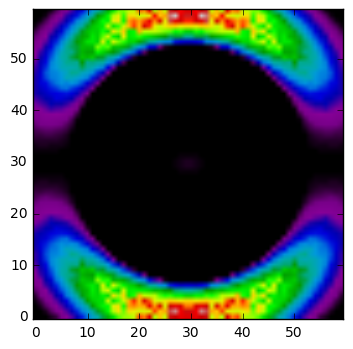

In [4]:
plt.imshow(sr_calc.Data['Rad'].sum(0).T,origin='lower',cmap=plt.cm.spectral)

In [7]:
sr_calc.Args['Grid']

[(13930.34825870647, 20895.522388059704),
 (-5.0, 5.0),
 (-5.0, 5.0),
 180.0,
 (60, 60, 60)]

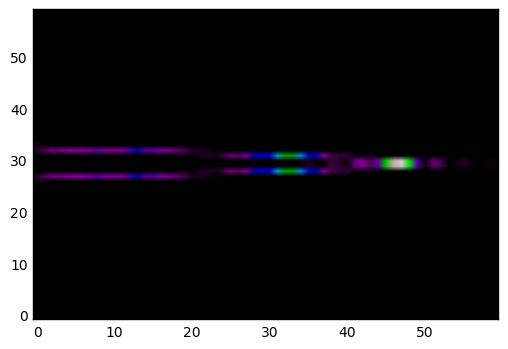

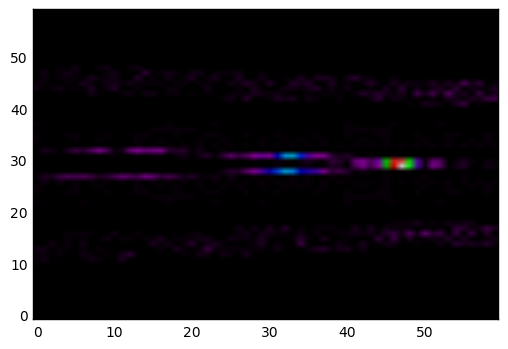

In [8]:
plt.figure()
plt.imshow(sr_calc.Data['Rad'][:,:,30].T,origin='lower',aspect='auto',cmap=plt.cm.spectral)
plt.figure()
plt.imshow(sr_calc.Data['Rad'][:,30,:].T,origin='lower',aspect='auto',cmap=plt.cm.spectral)

